# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.13.3-epsilon-fu5.new.420.422.429.fix.438.441'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Solomon Islands', 'Holy See', 'Laos', 'Timor-Leste'],
 3: ['Saint Kitts and Nevis'],
 4: ['Dominica', 'Tanzania', 'Fiji', 'Brunei'],
 5: ['Saint Lucia', 'Equatorial Guinea', 'Grenada'],
 6: ['Cambodia', 'Mauritius', 'Antigua and Barbuda'],
 7: ['Saint Vincent and the Grenadines'],
 8: ['Barbados', 'Northern Mariana Islands', 'Kyrgyzstan', 'Madagascar',
     'Trinidad and Tobago', 'Bahamas'],
 9: ['Bhutan', 'Uzbekistan', 'Gambia', 'Malawi', 'Ghana', 'Seychelles',
     'Jamaica', 'Liechtenstein', 'Australia', 'Republic of the Congo',
     'Sao Tome and Principe', 'Monaco', 'Vietnam', 'Bolivia', 'Djibouti',
     'Kazakhstan', 'Oman'],
 10: ['Lesotho', 'South Africa', 'El Salvador', 'Zimbabwe', 'Iraq',
      'Philippines', 'Colombia', 'Ethiopia', 'Mongolia', 'Kenya', 'Namibia',
      'Papua New Guinea', 'Suriname', 'Guatemala', 'Virgin Islands, U.S.',
      'India', 'Maldives', 'Bahrain', 'Venezuela', 'Cape Verde', 'Guam',
      'Kuwait', 'Libya', 'Mozambique', 'Zambia', 'Chile', 'Bu

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=17)
# The number of countries
len(analyser.countries)

4

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['United Kingdom', 'Portugal', 'Norway', 'Germany']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country        Phase                                        
United Kingdom 0th    Past  23Feb2020  09Apr2020    66460344
               1st    Past  10Apr2020  30Apr2020    66460344
               2nd    Past  01May2020  27May2020    66460344
               3rd    Past  28May2020  05Aug2020    66460344
               4th    Past  06Aug2020  15Sep2020    66460344
...                    ...        ...        ...         ...
Germany        12th   Past  18Nov2020  24Nov2020    82905782
               13th   Past  25Nov2020  01Dec2020    82905782
               14th   Past  02Dec2020  08Dec2020    82905782
               15th   Past  09Dec2020  14Dec2020    82905782
               16th   Past  15Dec2020  25Dec2020    82905782

[68 rows x 4 columns]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	NOR, 11th phase (04Nov2020 - 09Nov2020): finished  366 trials in 0 min 10 sec

	NOR, 14th phase (01Dec2020 - 08Dec2020): finished  363 trials in 0 min 10 sec

	GBR, 11th phase (11Nov2020 - 16Nov2020): finished  366 trials in 0 min 10 sec

	NOR, 10th phase (29Oct2020 - 03Nov2020): finished  367 trials in 0 min 10 sec

	NOR,  9th phase (21Oct2020 - 28Oct2020): finished  349 trials in 0 min 10 sec

	GBR,  1st phase (10Apr2020 - 30Apr2020): finished  340 trials in 0 min 10 sec

	PRT,  3rd phase (02Jun2020 - 02Jul2020): finished  336 trials in 0 min 10 sec

	GBR,  7th phase (12Oct2020 - 19Oct2020): finished  346 trials in 0 min 10 sec

	NOR,  0th phase (15Mar2020 - 24Mar2020): finished  340 trials in 0 min 10 sec

	GBR, 16th phase (15Dec2020 - 25Dec2020): finished  339 trials in 0 min 10 sec

	PRT, 12th phase (15Nov2020 - 25Nov2020): finished  338 trials in 0 min 10 sec

	GBR,  8th phase (20Oct2020 - 27Oct2020): finished  341 trials in 0 min 10 sec

	NOR,  2nd phase (03Apr2020 - 20Apr2020): finished  348 trials in 0 min 10 sec

	GBR,  4th phase (06Aug2020 - 15Sep2020): finished  342 trials in 0 min 10 sec

	PRT,  7th phase (01Oct2020 - 13Oct2020): finished  350 trials in 0 min 10 sec

	DEU,  7th phase (09Oct2020 - 20Oct2020): finished  350 trials in 0 min 10 sec

	GBR, 10th phase (04Nov2020 - 10Nov2020): finished  344 trials in 0 min 10 sec

	PRT, 16th phase (17Dec2020 - 25Dec2020): finished  343 trials in 0 min 10 sec

	NOR,  8th phase (06Oct2020 - 20Oct2020): finished  340 trials in 0 min 10 sec

	NOR, 15th phase (09Dec2020 - 16Dec2020): finished  342 trials in 0 min 10 sec

	PRT,  4th phase (03Jul2020 - 11Aug2020): finished  330 trials in 0 min 10 sec

	DEU,  6th phase (16Sep2020 - 08Oct2020): finished  338 trials in 0 min 10 sec

	DEU, 13th phase (25Nov2020 - 01Dec2020): finished  344 trials in 0 min 10 sec

	DEU,  5th phase (16Aug2020 - 15Sep2020): finished  335 trials in 0 min 10 sec

	GBR,  3rd phase (28May2020 - 05Aug2020): finished  327 trials in 0 min 10 sec

	DEU,  3rd phase (22Apr2020 - 17Jun2020): finished  329 trials in 0 min 10 sec

	PRT,  1st phase (04Apr2020 - 22Apr2020): finished  346 trials in 0 min 10 sec

	NOR,  7th phase (21Sep2020 - 05Oct2020): finished  347 trials in 0 min 10 sec

	GBR, 14th phase (02Dec2020 - 08Dec2020): finished  323 trials in 0 min 10 sec

	NOR,  4th phase (03Jun2020 - 09Aug2020): finished  299 trials in 0 min 10 sec

	GBR,  0th phase (23Feb2020 - 09Apr2020): finished  305 trials in 0 min 10 sec

	PRT, 13th phase (26Nov2020 - 02Dec2020): finished  318 trials in 0 min 10 sec

	PRT,  9th phase (22Oct2020 - 28Oct2020): finished  336 trials in 0 min 10 sec

	DEU,  8th phase (21Oct2020 - 27Oct2020): finished  336 trials in 0 min 10 sec

	PRT,  6th phase (12Sep2020 - 30Sep2020): finished  332 trials in 0 min 10 sec

	GBR,  5th phase (16Sep2020 - 02Oct2020): finished  332 trials in 0 min 10 sec

	NOR,  6th phase (05Sep2020 - 20Sep2020): finished  329 trials in 0 min 10 sec

	DEU,  2nd phase (05Apr2020 - 21Apr2020): finished  330 trials in 0 min 10 sec

	PRT, 10th phase (29Oct2020 - 04Nov2020): finished  336 trials in 0 min 10 sec

	PRT, 15th phase (10Dec2020 - 16Dec2020): finished  336 trials in 0 min 10 sec

	DEU,  4th phase (18Jun2020 - 15Aug2020): finished  326 trials in 0 min 10 sec

	NOR, 12th phase (10Nov2020 - 22Nov2020): finished  342 trials in 0 min 10 sec

	NOR,  1st phase (25Mar2020 - 02Apr2020): finished  344 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 03Apr2020): finished  335 trials in 0 min 10 sec

	DEU, 11th phase (11Nov2020 - 17Nov2020): finished  330 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 23Mar2020): finished  313 trials in 0 min 10 sec

	PRT, 14th phase (03Dec2020 - 09Dec2020): finished  329 trials in 0 min 10 sec

	GBR,  6th phase (03Oct2020 - 11Oct2020): finished  324 trials in 0 min 10 sec

	GBR,  9th phase (28Oct2020 - 03Nov2020): finished  335 trials in 0 min 10 sec

	NOR, 13th phase (23Nov2020 - 30Nov2020): finished  329 trials in 0 min 10 sec

	GBR, 15th phase (09Dec2020 - 14Dec2020): finished  323 trials in 0 min 10 sec

	NOR,  5th phase (10Aug2020 - 04Sep2020): finished  313 trials in 0 min 10 sec

	GBR, 13th phase (24Nov2020 - 01Dec2020): finished  330 trials in 0 min 10 sec

	DEU, 12th phase (18Nov2020 - 24Nov2020): finished  331 trials in 0 min 10 sec

	PRT,  5th phase (12Aug2020 - 11Sep2020): finished  320 trials in 0 min 10 sec

	GBR,  2nd phase (01May2020 - 27May2020): finished  324 trials in 0 min 10 sec

	GBR, 12th phase (17Nov2020 - 23Nov2020): finished  348 trials in 0 min 10 sec

	PRT,  2nd phase (23Apr2020 - 01Jun2020): finished  332 trials in 0 min 10 sec

	NOR,  3rd phase (21Apr2020 - 02Jun2020): finished  329 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 04Apr2020): finished  342 trials in 0 min 10 sec

	PRT, 11th phase (05Nov2020 - 14Nov2020): finished  341 trials in 0 min 10 sec

	PRT,  8th phase (14Oct2020 - 21Oct2020): finished  342 trials in 0 min 10 sec

Completed optimization. Total: 2 min 51 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country        Phase                                                         
United Kingdom 0th    Past  23Feb2020  09Apr2020    66460344  SIR-F  32.44   
               1st    Past  10Apr2020  30Apr2020    66460344  SIR-F   1.38   
               2nd    Past  01May2020  27May2020    66460344  SIR-F   0.82   
               3rd    Past  28May2020  05Aug2020    66460344  SIR-F   0.69   
               4th    Past  06Aug2020  15Sep2020    66460344  SIR-F   1.47   
...                    ...        ...        ...         ...    ...    ...   
Germany        12th   Past  18Nov2020  24Nov2020    82905782  SIR-F   0.86   
               13th   Past  25Nov2020  01Dec2020    82905782  SIR-F   0.96   
               14th   Past  02Dec2020  08Dec2020    82905782      -      -   
               15th   Past  09Dec2020  14Dec2020    82905782      -      -   
               16th   Past  15Dec2020  25Dec2020    82905782      -      -   

                            theta        kappa        rho       sigma  tau  \
Country        Phase                                                         
United Kingdom 0th      0.0343094  0.000727181  0.0579224  0.00099718  360   
               1st       0.196243  9.84009e-05  0.0194493   0.0112076  360   
               2nd      0.0817904  0.000427021  0.0145314   0.0158694  360   
               3rd       0.048902  0.000288267  0.0138294   0.0187235  360   
               4th     0.00138213  0.000194556  0.0187618   0.0125128  360   
...                           ...          ...        ...         ...  ...   
Germany        12th     0.0163381  4.55898e-06  0.0152919   0.0174286  360   
               13th   0.000256219  0.000256566  0.0153736    0.015748  360   
               14th             -            -          -           -    -   
               15th             -            -          -           -    -   
               16th             -            -          -           -    -   

                     1/alpha2 [day] alpha1 [-] 1/beta [day] 1/gamma [day]  \
Country        Phase                                                        
United Kingdom 0th              343      0.034            4           250   
               1st             2540      0.196           12            22   
               2nd              585      0.082           17            15   
               3rd              867      0.049           18            13   
               4th             1284      0.001           13            19   
...                             ...        ...          ...           ...   
Germany        12th           54836      0.016           16            14   
               13th             974          0           16            15   
               14th               -          -            -             -   
               15th               -          -            -             -   
               16th               -          -            -             -   

                          RMSLE Trials       Runtime  
Country        Phase                                  
United Kingdom 0th     0.713456    305  0 min 10 sec  
               1st    0.0740106    340  0 min 10 sec  
               2nd    0.0547342    324  0 min 10 sec  
               3rd     0.111747    327  0 min 10 sec  
               4th    0.0616086    342  0 min 10 sec  
...                         ...    ...           ...  
Germany        12th   0.0207958    331  0 min 10 sec  
               13th   0.0221536    344  0 min 10 sec  
               14th           -      -             -  
               15th           -      -             -  
               16th           -      -             -  

[68 rows x 18 columns]

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-23,United Kingdom,0.0343094,0.000727181,0.0579224,0.00099718,0.034,343,4,250,...,0,0,0,0,0,0,2,1,2,11.11
1,2020-02-23,United Kingdom,0.0343094,0.000727181,0.0579224,0.00099718,0.034,343,4,250,...,0,0,0,0,0,0,2,1,2,11.11
2,2020-02-23,United Kingdom,0.0343094,0.000727181,0.0579224,0.00099718,0.034,343,4,250,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-23,United Kingdom,0.0343094,0.000727181,0.0579224,0.00099718,0.034,343,4,250,...,0,0,0,0,0,0,2,1,2,11.11
4,2020-02-23,United Kingdom,0.0343094,0.000727181,0.0579224,0.00099718,0.034,343,4,250,...,0,0,0,0,0,0,2,1,2,11.11


### $Rt$: Reprodcution number $\mathrm{[-]}$

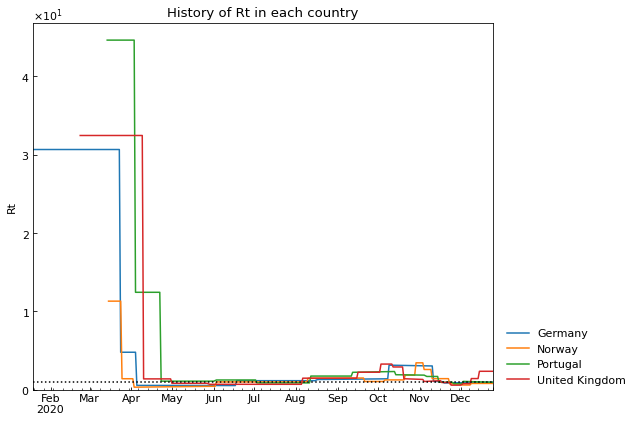

Country,Germany,Norway,Portugal,United Kingdom
Date,,,,
2020-12-21,0.96,0.8,0.95,2.35
2020-12-22,0.96,0.8,0.95,2.35
2020-12-23,0.96,0.8,0.95,2.35
2020-12-24,0.96,0.8,0.95,2.35
2020-12-25,0.96,0.8,0.95,2.35


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

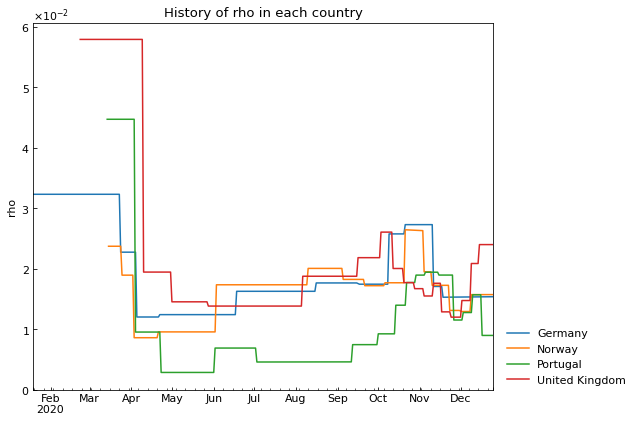

Country,Germany,Norway,Portugal,United Kingdom
Date,,,,
2020-12-21,0.015374,0.015725,0.008974,0.023994
2020-12-22,0.015374,0.015725,0.008974,0.023994
2020-12-23,0.015374,0.015725,0.008974,0.023994
2020-12-24,0.015374,0.015725,0.008974,0.023994
2020-12-25,0.015374,0.015725,0.008974,0.023994


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

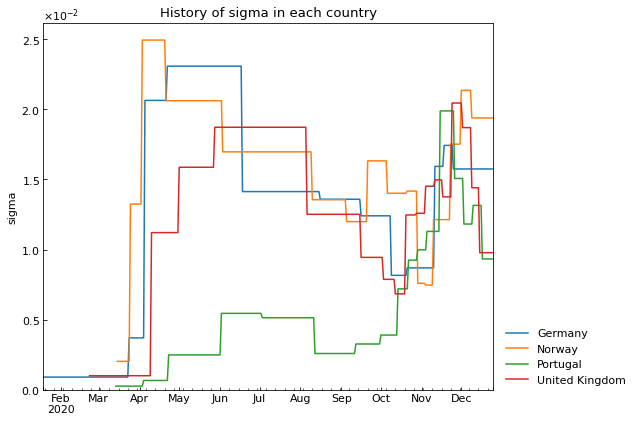

Country,Germany,Norway,Portugal,United Kingdom
Date,,,,
2020-12-21,0.015748,0.019389,0.009326,0.009774
2020-12-22,0.015748,0.019389,0.009326,0.009774
2020-12-23,0.015748,0.019389,0.009326,0.009774
2020-12-24,0.015748,0.019389,0.009326,0.009774
2020-12-25,0.015748,0.019389,0.009326,0.009774


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

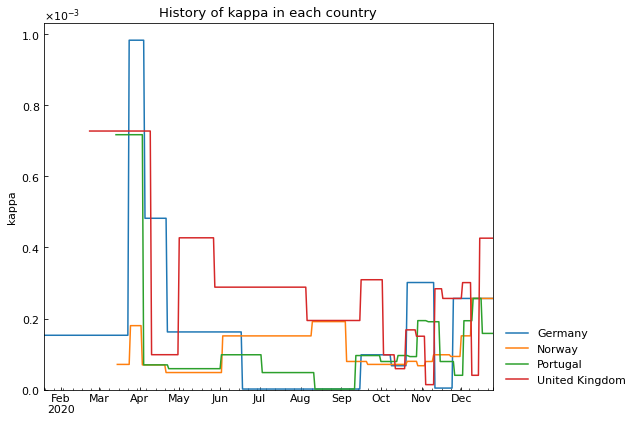

Country,Germany,Norway,Portugal,United Kingdom
Date,,,,
2020-12-21,0.000257,0.000257,0.000158,0.000426
2020-12-22,0.000257,0.000257,0.000158,0.000426
2020-12-23,0.000257,0.000257,0.000158,0.000426
2020-12-24,0.000257,0.000257,0.000158,0.000426
2020-12-25,0.000257,0.000257,0.000158,0.000426


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

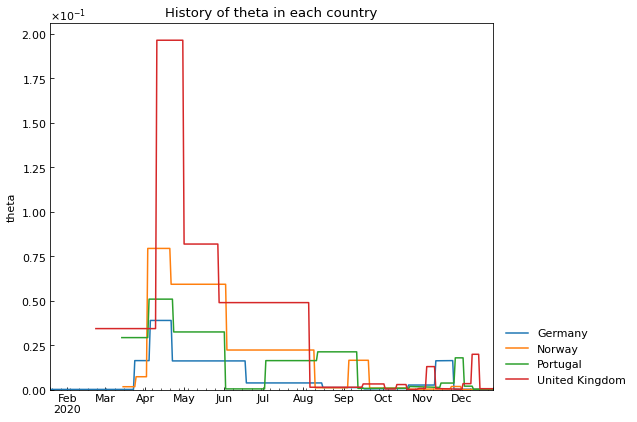

Country,Germany,Norway,Portugal,United Kingdom
Date,,,,
2020-12-21,0.000256,0.000204,0.000353,0.000569
2020-12-22,0.000256,0.000204,0.000353,0.000569
2020-12-23,0.000256,0.000204,0.000353,0.000569
2020-12-24,0.000256,0.000204,0.000353,0.000569
2020-12-25,0.000256,0.000204,0.000353,0.000569


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15708 entries, 0 to 15749
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 15708 non-null  datetime64[ns]
 1   Country                              15708 non-null  object        
 2   Rt                                   15708 non-null  float64       
 3   theta                                15708 non-null  float64       
 4   kappa                                15708 non-null  float64       
 5   rho                                  15708 non-null  float64       
 6   sigma                                15708 non-null  float64       
 7   School_closing                       15708 non-null  int64         
 8   Workplace_closing                    15708 non-null  int64         
 9   Cancel_events                        15708 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.051750,0.488056,0.851037,-0.700785,-0.316417,-0.549250,-0.731458,-0.799511,-0.273819,-0.316210,-0.476104,-0.520703,-0.455874,-0.624989,-0.244447,-0.625023
theta,-0.051750,1.000000,0.145444,-0.004093,0.104849,0.507644,0.377873,0.082795,0.105285,0.261615,0.320548,0.329645,-0.471829,0.114260,-0.355981,-0.369372,0.267467
kappa,0.488056,0.145444,1.000000,0.640668,-0.220473,0.161089,-0.039702,-0.239863,-0.229170,0.047061,-0.078539,-0.020001,-0.361136,0.044811,-0.533877,-0.217687,-0.039953
rho,0.851037,-0.004093,0.640668,1.000000,-0.550531,-0.316081,-0.392790,-0.586261,-0.603588,-0.250815,-0.296883,-0.297467,-0.556812,-0.225048,-0.565330,-0.147773,-0.497981
sigma,-0.700785,0.104849,-0.220473,-0.550531,1.000000,0.355610,0.365249,0.493631,0.594661,0.035374,0.072825,0.375330,0.334001,0.324409,0.322847,0.249196,0.435147
School_closing,-0.316417,0.507644,0.161089,-0.316081,0.355610,1.000000,0.644376,0.518841,0.533913,0.388136,0.476692,0.575175,0.043136,0.338184,-0.015753,-0.111088,0.690643
Workplace_closing,-0.549250,0.377873,-0.039702,-0.392790,0.365249,0.644376,1.000000,0.822626,0.828454,0.507980,0.712359,0.649749,0.191944,0.531566,0.348816,-0.162629,0.883290
Cancel_events,-0.731458,0.082795,-0.239863,-0.586261,0.493631,0.518841,0.822626,1.000000,0.893654,0.424860,0.617927,0.610008,0.484040,0.618765,0.566742,0.095175,0.884577
Gatherings_restrictions,-0.799511,0.105285,-0.229170,-0.603588,0.594661,0.533913,0.828454,0.893654,1.000000,0.380223,0.524146,0.648346,0.464688,0.560281,0.549118,0.137916,0.855399
Transport_closing,-0.273819,0.261615,0.047061,-0.250815,0.035374,0.388136,0.507980,0.424860,0.380223,1.000000,0.472614,0.578608,-0.178979,0.252835,-0.005281,-0.254568,0.569727


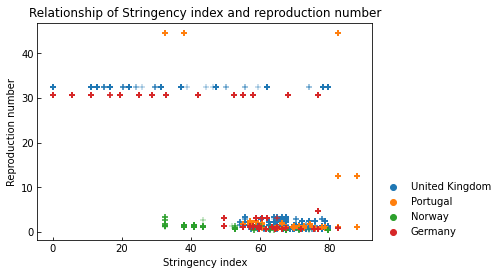

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()